In [19]:
# reforçando o que foi aprendido - importar dados

import pandas as pd

df = pd.read_csv(r'C:\Users\luizs\Documents\Python\estudos\diario\databases\jobs-and-salaries-in-data-science\jobs_in_data.csv')

print(df.columns)

print()

print(df.head())

print()

print(type(df))

print()

# informar dimensão da tabela

print(df.shape)

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3            

In [15]:
# usando sql no python

# importanr a funcao sqldf da biblioteca pandasql
from pandasql import sqldf

# criar uma funcao que aceite uma query sql em formato de string, chamada de 'q'
# utilizar uma funcao anonima (lambda) para simplificar - senão teria que criar uma funcao nomeada utilizando a declaracao 'def'
# utilizar o dicionário global para que a funcao tenha acesso a todas as variaveis do notebook

pysqldf = lambda q: sqldf(q, globals()) # nome da funcao (pysqldf) = funcao anonima (lambda) query (q): funcao (sqldf) (query(q), dicionario global (globals))

# armazenar a query em uma variável

query_soma_salario_ano = "SELECT DISTINCT work_year, SUM(salary) as 'salary' FROM df GROUP BY work_year ORDER BY salary desc"

# aplicar a funcao criada anteriormente na query

soma_salario_ano = pysqldf(query_soma_salario_ano)

print(soma_salario_ano)

   work_year      salary
0       2023  1152946903
1       2022   220520034
2       2021    21531519
3       2020     7577809


In [16]:
# reforçando o que foi aprendido - funções de agregação

sum_salary_year = df.groupby('work_year')['salary'].sum().reset_index()

print(sum_salary_year)

print()

mean_salary_year = df.groupby('work_year')['salary'].mean().reset_index()

print(mean_salary_year)

   work_year      salary
0       2020     7577809
1       2021    21531519
2       2022   220520034
3       2023  1152946903

   work_year         salary
0       2020  106729.704225
1       2021  109297.050761
2       2022  134957.181151
3       2023  154695.679995


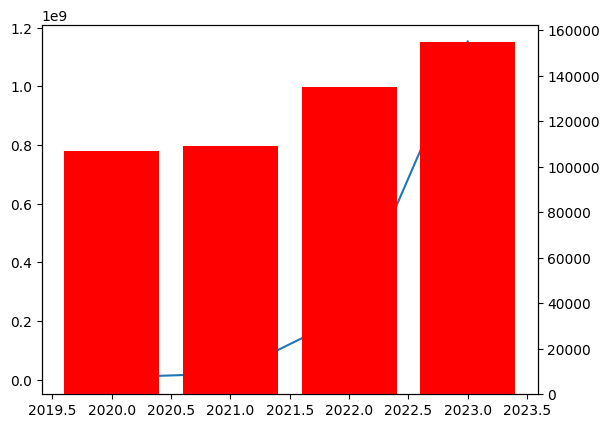

In [17]:
# reforçando o que foi aprendido - gráficos

import matplotlib.pyplot as plt

ax1 = plt.subplot()
ax2 = ax1.twinx()

ax1.plot(sum_salary_year['work_year'], sum_salary_year['salary'])
ax2.bar(
    mean_salary_year['work_year'], mean_salary_year['salary']
    , color = 'red'
)
plt.xlabel = 'work_year'
plt.ylabel = 'salary'
plt.show()